# Взвешивание объектов. Практика

## Цели практической работы

- разобрать работу метода ближайших соседей;
- потренировать в построении модели методом ближайших соседей;
- научиться разбираться в готовом коде и изменять его при необходимости.

## Что входит в практическую работу

- Загрузить данные и ознакомиться с ними.
- Разобрать решение методом ближайших соседей.
- Изменить алгоритм на метод взвешенных ближайших соседей, добавив необходимые вычисления.
- Произвести предсказание методом ближайших соседей и методом взвешенных ближайших соседей.

## Что оценивается 

- Программа выдаёт верный ответ на заданном наборе данных.

Откройте Jupyter Notebook и выполните задачи.
Задание не нужно сдавать на проверку.

## Задача

Пусть у нас имеется некоторый набор данных `knn_example.csv`, где `x1`, `x2` — это признаки, а `class` — класс наших объектов. Всего в данных представлено 4 класса.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('6.3 knn_example2.csv')

Отобразим их на графике:

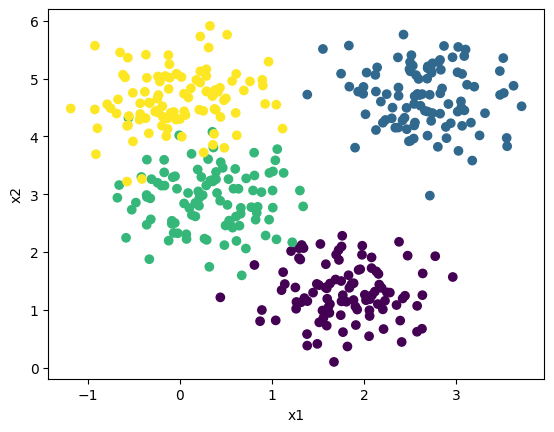

In [3]:
plt.scatter(data['x1'], data['x2'], c=data['class'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Пусть нам также даны 10 объектов с признаками `x1`, `x2`, но принадлежность к классу `class` неизвестна.

In [4]:
test = {'x1':[1.5, 0, 1, 2, 2, 3, 1.5, 0, 1.5, 3],
        'x2': [0, 2, 4, 3, 6, 3, 5, 3.5, 4, 0]}
        
test = pd.DataFrame(test)

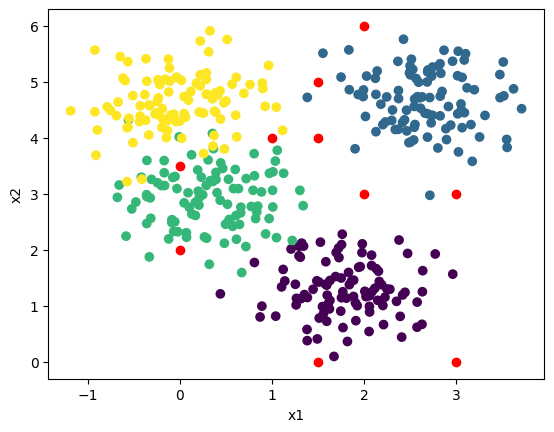

In [5]:
plt.scatter(data['x1'], data['x2'], c=data['class'])
plt.scatter(test['x1'], test['x2'], c='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Создадим алгоритм решения задачи методом ближайших соседей, предварительно импортируем `distance` для расчёта евклидова расстояния и `operator`, `collections` для упрощения вспомогательных расчётов.

In [6]:
from scipy.spatial import distance
import operator
import collections

Фунция получения ближайших соседей следующая:

In [7]:
def getNeighbors(data, test_object, k):
  '''
  data - выборка с объектами
  test_object - исследуемый объект
  k - число ближайших соседей
  '''
  # формируем список для сохранения значений растояний
  distances = []
  for x in range(len(data)):
      # расчитываем расстояния от объекта test_object до всех объектов выборки data
      dist = distance.euclidean(test_object, data.iloc[x,:2])
      distances.append([list(data.iloc[x]), dist])
  # сортируем список расстояний до объекта test_object
  distances.sort(key=operator.itemgetter(1))
  # выбираем только k ближайших соседа
  neighbors = [i[0][2] for i in distances[:k]]
  return neighbors

Проверим работу для нулевого объекта:

In [8]:
neighbors = getNeighbors(data, test.iloc[0], 7)
neighbors

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Создадим функцию определения класса объекта, исходя из классов его соседей:

In [9]:
def getClass(neighbors):
  '''
  neighbors - список классов соседей
  '''
  # возьмем класс, который чаще всего встречается в neighbors
  res = collections.Counter(neighbors).most_common(1)
  class_ = res[0][0]
  return class_

Проверим работу:

In [10]:
getClass(neighbors)

0.0

Объеденим решение:

In [15]:
test_object_id = 8 # id проверяемого объекта
k_neighbors = 7

neighbors = getNeighbors(data, test.iloc[test_object_id], k_neighbors)
print('neighbors:', neighbors)
object_class = getClass(neighbors)

print(f'Объект {test_object_id} с параметрами {list(test.iloc[test_object_id])} принадлежит классу {int(object_class)}')

neighbors: [3.0, 1.0, 2.0, 2.0, 1.0, 1.0, 3.0]
Объект 8 с параметрами [1.5, 4.0] принадлежит классу 1


### Измените функции для реализации метода взвешенных ближайших соседей

Чтобы реализовать расчёт методом взвешенных ближайших соседей, доработайте следующую функцию:

In [36]:
def getWeightClass(neighbors):
    '''
    neighbors - список классов соседей
    '''
    # TODO
    # Ваш код здесь
    w = {}
    k = len(neighbors)
    for i, neighbor in enumerate(neighbors):
        if neighbor in w.keys():
            w[neighbor] += (k-i)/k
        else:
            w[neighbor] = (k-i)/k
    return  max(w.items(), key=operator.itemgetter(1))[0]

In [37]:
st = getWeightClass(neighbors)
st

1.0

Проверьте реализацию:

In [40]:
test_object_id = 9 # id проверяемого объекта
k_neighbors = 7

neighbors = getNeighbors(data, test.iloc[test_object_id], k_neighbors)
neighbors = getWeightClass(neighbors)
print('neighbors:', neighbors)
# object_class = getClass(neighbors)

print(f'Объект {test_object_id} с параметрами {list(test.iloc[test_object_id])} принадлежит классу {int(neighbors)}')

neighbors: 0.0
Объект 9 с параметрами [3.0, 0.0] принадлежит классу 0


Сравните результаты для метода ближайших соседей и метода взвешенных ближайших соседей для всех объектов из `test`.

In [46]:
# TODO
# Ваш код здесь
for i in test.index:
    neighbors = getNeighbors(data, test.iloc[i], k_neighbors)
    neighbors = getWeightClass(neighbors)
    print(f'Объект {i} с параметрами {list(test.iloc[i])} принадлежит классу {int(neighbors)}')

Объект 0 с параметрами [1.5, 0.0] принадлежит классу 0
Объект 1 с параметрами [0.0, 2.0] принадлежит классу 2
Объект 2 с параметрами [1.0, 4.0] принадлежит классу 3
Объект 3 с параметрами [2.0, 3.0] принадлежит классу 2
Объект 4 с параметрами [2.0, 6.0] принадлежит классу 1
Объект 5 с параметрами [3.0, 3.0] принадлежит классу 1
Объект 6 с параметрами [1.5, 5.0] принадлежит классу 1
Объект 7 с параметрами [0.0, 3.5] принадлежит классу 2
Объект 8 с параметрами [1.5, 4.0] принадлежит классу 1
Объект 9 с параметрами [3.0, 0.0] принадлежит классу 0


|

|

|

|

|

|

|

|

|

|

|

|

|

|

|

|

|

|

|

## Решение

Это лишь один вариант возможной реализации.

Вспомним, что $w_i = \frac{k+1-i}{k}$

In [ ]:
weight = [(k_neighbors+1-i)/k_neighbors for i in range(1, len(neighbors)+1)]
weight

[1.0,
 0.8571428571428571,
 0.7142857142857143,
 0.5714285714285714,
 0.42857142857142855,
 0.2857142857142857,
 0.14285714285714285]

In [ ]:
weight_neighbors = [i for i in zip(neighbors, weight)]
weight_neighbors

[(0.0, 1.0),
 (0.0, 0.8571428571428571),
 (0.0, 0.7142857142857143),
 (0.0, 0.5714285714285714),
 (0.0, 0.42857142857142855),
 (0.0, 0.2857142857142857),
 (0.0, 0.14285714285714285)]

In [ ]:
d = {}
for n in weight_neighbors:
    # добавить имя в словарь, если его еще нет
    if n[0] not in d:
        d[n[0]] = 0

    # если имя уже существует, обновить значение 
    d[n[0]] += n[1]

In [ ]:
d

{0.0: 4.0}

In [ ]:
class_ = -1
class_d = 0
for key in d:
  if d[key]>class_d:
    class_d = d[key]
    class_ = key

print(class_d, class_)

4.0 0.0


Соберём всё в одну функцию:

In [ ]:
def getweightClass(neighbors):
  '''
  neighbors - список классов соседей
  '''
  k_neighbors = len(neighbors)
  weight = [(k_neighbors+1-i)/k_neighbors for i in range(1, len(neighbors)+1)]
  weight_neighbors = [i for i in zip(neighbors, weight)]

  d = {}
  for n in weight_neighbors:
      # добавить имя в словарь, если его еще нет
      if n[0] not in d:
          d[n[0]] = 0

      # если имя уже существует, обновить значение 
      d[n[0]] += n[1]

  class_ = -1
  class_d = 0
  for key in d:
    if d[key]>class_d:
      class_d = d[key]
      class_ = key

  return class_

In [ ]:
test_object_id = 9 # id проверяемого объекта
k_neighbors = 7

neighbors = getNeighbors(data, test.iloc[test_object_id], k_neighbors)
print('neighbors:', neighbors)
object_class = getClass(neighbors)
object_weight_class = getweightClass(neighbors)

print(f'''Объект {test_object_id} с параметрами {list(test.iloc[test_object_id])} принадлежит:
классу {int(object_class)} или с учетом взвешивания {int(object_weight_class)}''')

neighbors: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Объект 9 с параметрами [3.0, 0.0] принадлежит:
классу 0 или с учетом взвешивания 0


In [ ]:
for i in range(10):
  test_object_id = i # id проверяемого объекта
  k_neighbors = 7

  neighbors = getNeighbors(data, test.iloc[test_object_id], k_neighbors)
  print('neighbors:', neighbors)
  object_class = getClass(neighbors)
  object_weight_class = getweightClass(neighbors)

  print(f'''Объект {test_object_id} с параметрами {list(test.iloc[test_object_id])} принадлежит:
классу {int(object_class)} или с учетом взвешивания {int(object_weight_class)}''')
  print('-'*10)

neighbors: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Объект 0 с параметрами [1.5, 0.0] принадлежит:
классу 0 или с учетом взвешивания 0
----------
neighbors: [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
Объект 1 с параметрами [0.0, 2.0] принадлежит:
классу 2 или с учетом взвешивания 2
----------
neighbors: [3.0, 2.0, 2.0, 3.0, 2.0, 3.0, 3.0]
Объект 2 с параметрами [1.0, 4.0] принадлежит:
классу 3 или с учетом взвешивания 3
----------
neighbors: [2.0, 2.0, 1.0, 0.0, 1.0, 0.0, 0.0]
Объект 3 с параметрами [2.0, 3.0] принадлежит:
классу 0 или с учетом взвешивания 2
----------
neighbors: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Объект 4 с параметрами [2.0, 6.0] принадлежит:
классу 1 или с учетом взвешивания 1
----------
neighbors: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0]
Объект 5 с параметрами [3.0, 3.0] принадлежит:
классу 1 или с учетом взвешивания 1
----------
neighbors: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Объект 6 с параметрами [1.5, 5.0] принадлежит:
классу 1 или с учетом взвешивания 1
----------
neighbors: [2